In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json


In [220]:
df = pd.read_json('./orders.json', orient='records')
df.set_index('id', inplace=True)


In [221]:
df

,name,email,notes,date,status,items,client
id,,,,,,,
95,Slo Food Market,retail@slofoodmarket.com,,2024-01-04 05:43:18.767000+00:00,completed,"[{""name"":""Beets, Golden"",""quantity"":80,""unit"":...",ggc
96,Jason il ritrovo,jschra12@gmail.com,,2024-01-07 05:34:31.907000+00:00,completed,"[{""name"":""Beets, Chioggia"",""quantity"":85,""unit...",ggc
97,Dreamport,dgent570@outlook.com,,2024-01-09 01:45:30.929000+00:00,completed,"[{""name"":""Beets, Chioggia"",""quantity"":73,""unit...",ggc
99,Dreamport,contact@dreamportmarket.com,,2024-01-22 09:13:04.820000+00:00,completed,"[{""name"":""Beets, Chioggia"",""quantity"":49,""unit...",ggc
100,DreamPort,contact@dreamportmarket.com,Delivery Tuesday?,2024-01-30 01:47:05.793000+00:00,completed,"[{""name"":""Cabbage, Green"",""quantity"":0,""unit"":...",ggc
...,...,...,...,...,...,...,...
269,Jason ritrovo,Jschra12@gmail.com,,2024-10-22 01:55:44.722000+00:00,completed,"[{""id"":26,""name"":""Arugula"",""quantity"":10,""unit...",ggc
270,Sean/ Slo Food,smcmullen@slofoodmarket.com,Please bunch Kale,2024-10-27 02:30:37.898000+00:00,pending,"[{""id"":54,""name"":""Green Onions"",""quantity"":8,""...",ggc
271,DreamPort Harvest Market,Contact@dreamportmarket@gmail.com,"Arugula - 12 bags please, please remember to c...",2024-10-27 08:07:54.865000+00:00,pending,"[{""id"":26,""name"":""Arugula"",""quantity"":25,""unit...",ggc


In [222]:
items = df['items'].values
parsed_data = [json.loads(item) for order in items for item in order]
df2 = pd.DataFrame(parsed_data)

ggc = df2[df2['client']=='ggc']
items


array([list(['{"name":"Beets, Golden","quantity":80,"unit":["lbs"],"price":["2"],"id":188,"cart":20,"unitSelected":0}', '{"name":"Cabbage, Red","quantity":40,"unit":["lbs"],"price":["2"],"id":186,"cart":20,"unitSelected":0}', '{"name":"Celeriac, without tops","quantity":85,"unit":["lbs"],"price":["2.5"],"id":14,"cart":15,"unitSelected":0}']),
       list(['{"name":"Beets, Chioggia","quantity":85,"unit":["lbs"],"price":["2"],"id":6,"cart":15,"unitSelected":0}', '{"name":"Beets, Golden","quantity":65,"unit":["lbs"],"price":["2"],"id":188,"cart":15,"unitSelected":0}']),
       list(['{"name":"Beets, Chioggia","quantity":73,"unit":["lbs"],"price":["2"],"id":6,"cart":12,"unitSelected":0}', '{"name":"Cabbage, Red","quantity":9,"unit":["lbs"],"price":["2"],"id":186,"cart":51,"unitSelected":0}', '{"name":"Winter Squash, Butternut","quantity":26.2,"unit":["lbs"],"price":["2"],"id":70,"cart":13.8,"unitSelected":0}']),
       list(['{"name":"Beets, Chioggia","quantity":49,"unit":["lbs"],"price":[

In [223]:
sub = ggc[['name', 'cart','unit','price','unitSelected','editedCart','unitratio']]


def parse_row(row):
    # print(row)
    unit_selected = int(row['unitSelected'])
    row['unit'] = row['unit'][unit_selected]
    row['price'] = float(row['price'][unit_selected])
    if unit_selected != 0 and pd.notna(row['unitratio']):
        row['cart'] = row['cart']*row['unitratio']
    if pd.notna(row['editedCart']):
        row['cart'] = row['editedCart']
    row['cart'] = float(row['cart'])
    row['price_sum'] = row['cart'] * row['price']

    return row[['name','cart','unit','price', 'price_sum']]

parsed = sub.apply(parse_row, axis=1)




In [224]:
print(f"Unit selected features used {len(sub[sub['unitSelected'] != 0])} times\nEdit cart features used {len(sub[pd.notna(sub['editedCart'])])} times")

Unit selected features used 13 times
Edit cart features used 21 times


In [225]:
product_revenue = parsed.groupby('name')['price_sum'].sum()
product_revenue_sorted = product_revenue.sort_values(ascending=True)
X = product_revenue_sorted.index[-15:]
y = product_revenue_sorted.values.astype(int)[-15:]


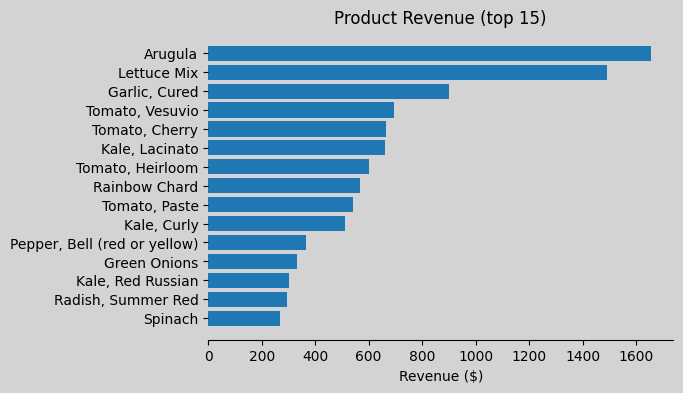

In [226]:
fig, ax = plt.subplots(figsize=(6, 4), facecolor='#d3d3d3')
ax.barh(y=X, width=y)  # 'width' specifies the values for the bars in a horizontal bar plot

# Labeling and displaying the plot
ax.set_xlabel('Revenue ($)')
ax.set_title('Product Revenue (top 15)')

# Remove all spines except the bottom
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_facecolor('#d3d3d3')
plt.show()

In [227]:
total_revenue = np.sum(product_revenue.values)
total_revenue.astype(int)

13196